# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import random

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [5]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [6]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [7]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


<AxesSubplot:xlabel='Risk', ylabel='count'>

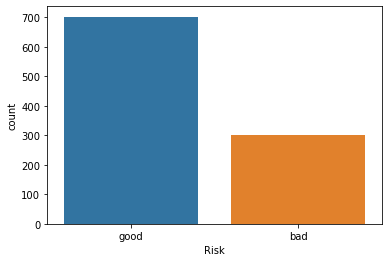

In [8]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [9]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [10]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [11]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,good
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,bad
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,good
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,good
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,bad


In [12]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

### Checking for missing values and removing the row. (in the data set there were only two rows with no value so I decided to just remove them)

In [13]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

In [14]:
df = df[df['Credit History'].notna()]
df = df[df['Job'].notna()]

In [15]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

## Checking for outliers

<AxesSubplot:ylabel='Age'>

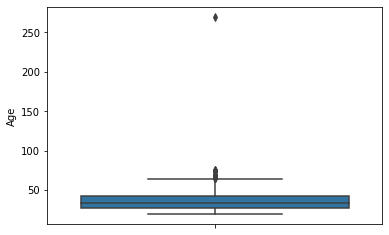

In [16]:
sns.boxplot(y=df['Age'])

The outlier must be Betty White, but will have to be removed anyway

In [17]:
df = df[df['Age'] < 125]

<AxesSubplot:ylabel='Age'>

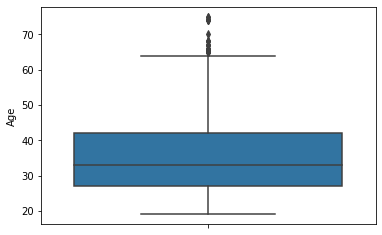

In [18]:
sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Duration'>

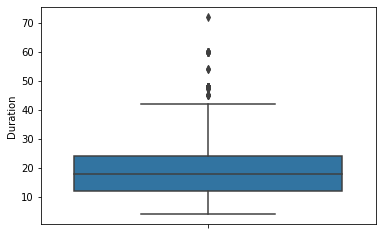

In [19]:
sns.boxplot(y=df['Duration'])

<AxesSubplot:ylabel='Years in current address'>

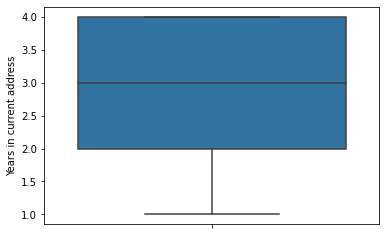

In [20]:
sns.boxplot(y=df['Years in current address'])

<AxesSubplot:ylabel='Credit Amount'>

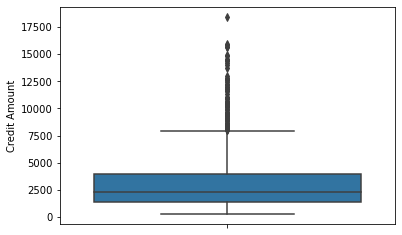

In [21]:
sns.boxplot(y=df['Credit Amount'])

<AxesSubplot:ylabel='Installment Rate'>

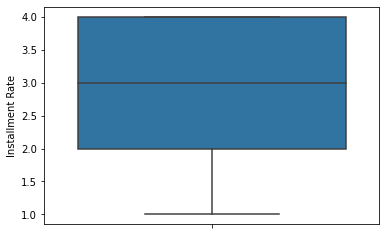

In [22]:
sns.boxplot(y=df['Installment Rate']) 

<AxesSubplot:ylabel='Liable'>

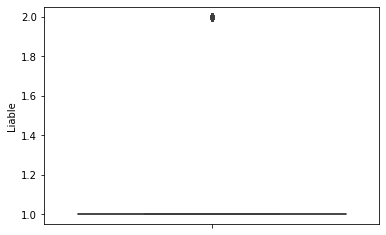

In [23]:
sns.boxplot(y=df['Liable']) 

<AxesSubplot:ylabel='Existing Credits'>

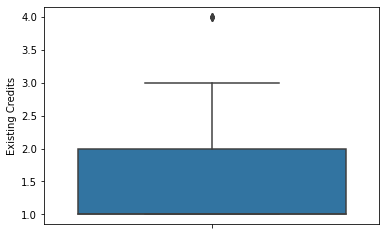

In [24]:
sns.boxplot(y=df['Existing Credits']) 

## Creating Dummy Variables

In [25]:
# separate the features into categorical vs numerical
numerical_features = ['Duration', 'Credit Amount', 'Installment Rate', 'Years in current address', 'Age', 'Existing Credits', 'Liable']
categorical_features = ['Checking Account', 'Credit History', 'Purpose', 'Saving Account', 'Employment Status', 'Personal Status', 'Guarantors', 'Property', 'Installment plans', 'Housing', 'Job']

# collect all numerical features with the target variables first
numerical_df = df[numerical_features + ['Risk']]
numerical_df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
0,6,1169,4,4,67,2,1,good
1,48,5951,2,2,22,1,1,bad
2,12,2096,2,3,49,1,2,good
3,42,7882,2,4,45,1,2,good
4,24,4870,3,4,53,2,2,bad


In [26]:
numerical_df['Risk'] = numerical_df['Risk'].apply(lambda x: 0 if x == 'good' else 1)

In [27]:
numerical_df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


In [28]:
# create corresponding dummies variables
Checking_Account = pd.get_dummies(df['Checking Account'],drop_first=True)
Credit_History = pd.get_dummies(df['Credit History'],drop_first=True)
Purpose = pd.get_dummies(df['Purpose'],drop_first=True)
Saving_Account = pd.get_dummies(df['Saving Account'],drop_first=True)
Employment_Status = pd.get_dummies(df['Employment Status'],drop_first=True)

Personal_Status = pd.get_dummies(df['Personal Status'],drop_first=True)
Guarantors = pd.get_dummies(df['Guarantors'],drop_first=True)
Property = pd.get_dummies(df['Property'],drop_first=True)
Installment_plans = pd.get_dummies(df['Installment plans'],drop_first=True)
Housing = pd.get_dummies(df['Housing'],drop_first=True)
Job = pd.get_dummies(df['Job'],drop_first=True)

In [29]:
Checking_Account.head()

,little,moderate,rich
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [30]:
Credit_History.head()

,delay,paid back
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0


In [31]:
Employment_Status.head()

,4 to <7 years,< 1 year,>= 7 years,unemployed
0,0,0,1,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0


In [32]:
df2 = pd.concat([numerical_df, Checking_Account, Credit_History, Purpose, Saving_Account, Employment_Status, Personal_Status, Guarantors, Property, Installment_plans, Housing, Job], axis = 1)

In [33]:
df2.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,little,moderate,...,life insurance,no property,real estate,none,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,1,0,0,0,1,0,0


## Correlations

In [34]:
df2.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,little,moderate,...,life insurance,no property,real estate,none,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
Duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,0.022244,0.089452,...,-0.056706,0.212838,-0.242586,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-1.812030e-01
Credit Amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,-0.020912,0.119612,...,-0.032556,0.248922,-0.248338,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-1.617570e-01
Installment Rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,0.046917,-0.051906,...,-0.020628,0.044990,-0.034555,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-5.723714e-02
Years in current address,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,0.088350,-0.055817,...,-0.023708,0.188028,-0.085194,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,9.064820e-03
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,-0.011162,-0.078121,...,-0.028686,0.206368,0.011538,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,4.371237e-02
Existing Credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,-0.029195,-0.052662,...,-0.009946,-0.012850,0.008568,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-1.039203e-02
Liable,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,0.059041,-0.066643,...,-0.006284,0.077548,0.020203,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,1.450658e-01
Risk,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,0.258333,0.119581,...,0.007238,0.125750,-0.119300,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-2.182179e-02
little,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,0.258333,1.000000,-0.372670,...,0.087282,0.048476,-0.036215,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,2.354213e-02
moderate,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,0.119581,-0.372670,1.000000,...,-0.039577,0.034825,-0.004300,-0.034576,-0.017507,0.001012,-0.000888,-0.067587,0.047382,1.804077e-02


## SVM with Credit History

In [33]:
X = df2.drop('Risk', axis=1)
Y = df2['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [35]:
Y_pred = model.predict(X_test)

In [36]:
print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       142
           1       0.55      0.36      0.44        58

    accuracy                           0.73       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200

Accuracy: 0.73
Confusion Matrix: [[125  17]
 [ 37  21]]


<AxesSubplot:xlabel='trial'>

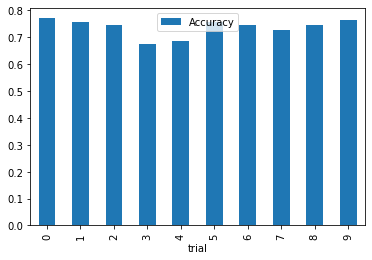

In [89]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC(kernel='linear')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

## SVM without Credit History

In [49]:
X = df2.drop(columns = ['Risk', 'delay', 'paid back'])
Y = df2['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [50]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [51]:
Y_pred = model.predict(X_test)

In [52]:
print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       142
           1       0.59      0.40      0.47        58

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200

Accuracy: 0.745
Confusion Matrix: [[126  16]
 [ 35  23]]


<AxesSubplot:xlabel='trial'>

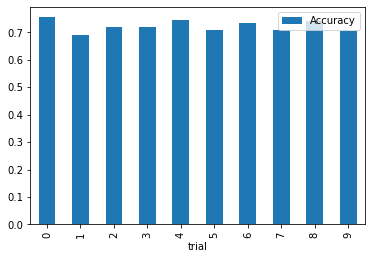

In [53]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC(kernel='linear')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

## Decision Tree without credit history

In [37]:
df2

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,little,moderate,...,life insurance,no property,real estate,none,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,12,1736,3,4,31,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1
998,30,3857,4,4,40,1,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
999,12,804,4,4,38,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1000,45,1845,4,4,23,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [38]:
Credit_History

,delay,paid back
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
997,0,1
998,0,1
999,0,1
1000,0,1


In [47]:
X = df2.drop(columns = ['Risk', 'delay', 'paid back'])
Y = df2['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [48]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
Y_pred = model.predict(X_test)

In [50]:
print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       142
           1       0.42      0.53      0.47        58

    accuracy                           0.66       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.66      0.67       200

Accuracy: 0.655
Confusion Matrix: [[100  42]
 [ 27  31]]


<AxesSubplot:xlabel='trial'>

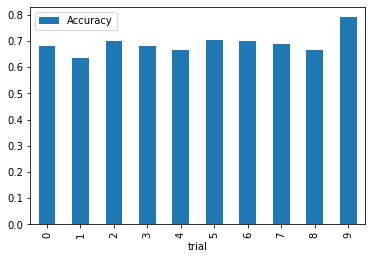

In [51]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

## Decision Tree with Credit History

In [52]:
X = df2.drop('Risk', axis = 1)
Y = df2['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [54]:
print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       142
           1       0.42      0.50      0.46        58

    accuracy                           0.66       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.66      0.66       200

Accuracy: 0.655
Confusion Matrix: [[102  40]
 [ 29  29]]


<AxesSubplot:xlabel='trial'>

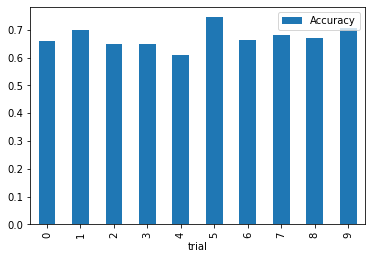

In [55]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

## Is past credit history an important factor?

The Decision Tree models show that credit history is not an important factor. Overall accuracy only increased by .02 after adding in the credit history variables. F1 scores only increased by .01. 
SVM without credit history performed better without credit history and had the best performance out of all the models.
All the models were not great at detecting a bad credit risk, with f1 scores being in the .4 to .5 range. They were better at detecting bad risk without credit history though.